In [152]:
import numpy as np
import matplotlib.pyplot as plt
import pylab
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

(150, 2)


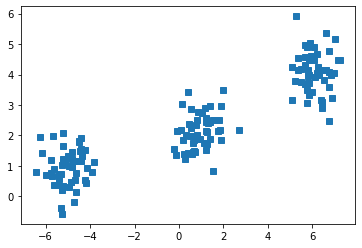

In [234]:
# simulate random data
nperclust = 50

# blur around centroids
blur = .6

# XY coordinates centroids locations
A = [-5,1]
B = [1,2]
C = [6,4]

# generate data
a = [A[0]+np.random.randn(nperclust)*blur,A[1]+np.random.randn(nperclust)*blur]
b = [B[0]+np.random.randn(nperclust)*blur,B[1]+np.random.randn(nperclust)*blur]
c = [C[0]+np.random.randn(nperclust)*blur,C[1]+np.random.randn(nperclust)*blur]

data = np.transpose(np.concatenate((a,b,c),axis=1))
print(np.shape(data))

plt.plot(data[:,0],data[:,1],'s')
plt.show()

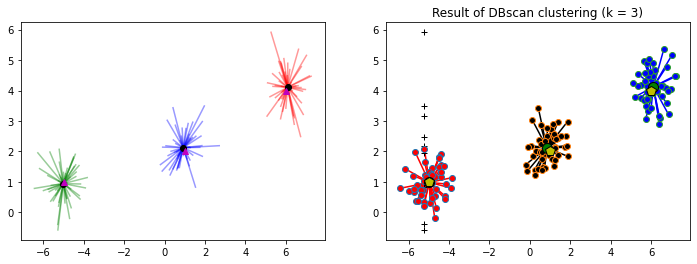

In [235]:
# k-means clustering

k = 3
kmeans = KMeans(n_clusters=k)
kmeans = kmeans.fit(data)
#group labels
groupidx = kmeans.predict(data)
#centroids
cents = kmeans.cluster_centers_

fig,ax = plt.subplots(1,2,figsize=(12,4))

# draw lines from each data point to the centroids of each cluster
lineColors = 'rgbgmrkbgm';
for i in range(0,len(data)):
    ax[0].plot([data[i,0],cents[groupidx[i],0]],[data[i,1],cents[groupidx[i],1]],
             lineColors[groupidx[i]],alpha=.4)
    
# plot the centroid locations
ax[0].plot(cents[:,0],cents[:,1],'ko')

# plot the ground truth
ax[0].plot(A[0],A[1],'m^')
ax[0].plot(B[0],B[1],'m^')
ax[0].plot(C[0],C[1],'m^')


# Dbscan clustering
clustmodel = DBSCAN(eps=.6,min_samples=6).fit(data)
groupidx = clustmodel.labels_
# numeber of clusters
nclust = max(groupidx)+1 # +1 for indexing
# compute cluster centers
cents = np.zeros((nclust,2))

for ci in range(nclust):
    cents[ci,0] = np.mean(data[groupidx==ci,0])
    cents[ci,1] = np.mean(data[groupidx==ci,1])

# draw lines from each data point to the centroids of each cluster
lineColors = 'rkbgmrkbgmrkbgmrkbgmrkbgmrkbgmrkbgmrkbgmrkbgmrkbgmrkbgmrkbgm'
for i in range(len(data)):
    if groupidx[i]==-1:
        ax[1].plot(data[1,0],data[i,1],'k+')
    else:
        ax[1].plot([data[i,0],cents[groupidx[i],0]],[data[i,1],
                cents[groupidx[i],1]],lineColors[groupidx[i]])

# plot the data raw in different colors
for i in range(nclust):
    ax[1].plot(data[groupidx==i,0],data[groupidx==i,1],'o',markerfacecolor=lineColors[i])
    
# plot the centroid locations
ax[1].plot(cents[:,0],cents[:,1],'ko',markerfacecolor='g',markersize=10)
ax[1].set_title('Result of DBscan clustering (k = '+str(nclust)+')')

# plot the ground truth
ax[1].plot(A[0],A[1],'kp',markersize=10,markerfacecolor='y')
ax[1].plot(B[0],B[1],'kp',markersize=10,markerfacecolor='y')
ax[1].plot(C[0],C[1],'kp',markersize=10,markerfacecolor='y')
plt.show()

(2000, 2)


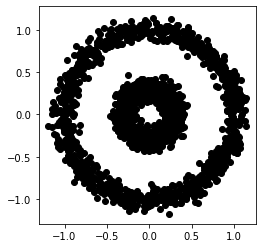

In [236]:
## Try again with nonlinear clusters

N = 1000
th = np.linspace(0,2*np.pi,N)

# create the two circles
data1 = np.array((np.cos(th), np.sin(th))) + np.random.randn(2,N)/15
data2 = .3*np.array((np.cos(th), np.sin(th))) + np.random.randn(2,N)/15

# put them together into one dataset
circdata = np.hstack((data1,data2)).T
print(np.shape(circdata))

# plot
plt.plot(circdata[:,0],circdata[:,1],'ko')
plt.axis('square')
plt.show()

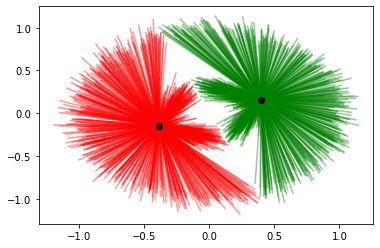

In [239]:
# k-means clustering with non linear clustering

k = 2
kmeans = KMeans(n_clusters=k)
kmeans = kmeans.fit(circdata)
#group labels
groupidx = kmeans.predict(circdata)
#centroids
cents = kmeans.cluster_centers_

# draw lines from each data point to the centroids of each cluster
lineColors = 'rgbgmrkbgm';
for i in range(0,len(circdata)):
    plt.plot([circdata[i,0],cents[groupidx[i],0]],[circdata[i,1],cents[groupidx[i],1]],
             lineColors[groupidx[i]],alpha=.4)
    
# plot the centroid locations
plt.plot(cents[:,0],cents[:,1],'ko')
plt.show()

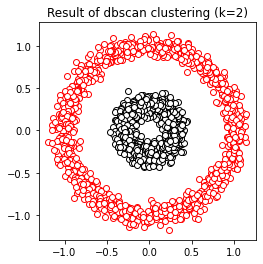

In [237]:
## dbscan

clustmodel = DBSCAN(eps=.2,min_samples=6).fit(circdata)
groupidx = clustmodel.labels_

nclust = max(groupidx)+1 # +1 for indexing

# now draw the raw data in different colors
for i in range(nclust):
    plt.plot(circdata[groupidx==i,0],circdata[groupidx==i,1],'o',color=lineColors[i],markerfacecolor='w')

# and plot unassigned data
plt.plot(circdata[groupidx==-1,0],circdata[groupidx==-1,1],'k+')
plt.axis('square')
plt.title('Result of dbscan clustering (k=' + str(nclust) + ')')

plt.show()